In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tr_df=pd.read_csv('../data/filepaths/sauti_train.txt', header=None)
te_df=pd.read_csv('../data/filepaths/sauti.test', header=None)
va_df=pd.read_csv('../data/filepaths/sauti_valid.txt', header=None)

print(tr_df.iloc[0][0])

/home/tejumade/fac-via-ppg/data/sautidb_released_28022021/EDO_IGBO_0122_M_A0043.wav


In [3]:
# Train Gender Frequency
gtr_df = tr_df[0].apply(lambda x: x.split('/')[-1].split("_")[-2])
gtr_df.value_counts()

M    443
F    275
Name: 0, dtype: int64

In [4]:
# Valid Gender Frequency
gva_df = va_df[0].apply(lambda x: x.split('/')[-1].split("_")[-2])
gva_df.value_counts()

M    121
F     64
Name: 0, dtype: int64

In [5]:
# Test Gender Frequency
gte_df = te_df[0].apply(lambda x: x.split('/')[-1].split("_")[-2])
gte_df.value_counts()

M    12
F     4
Name: 0, dtype: int64

In [7]:
sentr_df = tr_df[0].apply(lambda x: x.split('/')[-1].split("_")[-1])
senva_df = va_df[0].apply(lambda x: x.split('/')[-1].split("_")[-1])
sente_df = te_df[0].apply(lambda x: x.split('/')[-1].split("_")[-1])

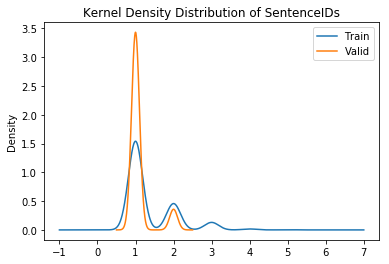

In [8]:
# Let's check the density distribution of the sentence_ID in train and valid set. Omitting test set because it's very small 
# and every speaker has just 1 sample, which means the variance will be 0. 
# see stackexchange answer for better understanding --> https://stats.stackexchange.com/questions/89754/statsmodels-error-in-kde-on-a-list-of-repeated-values 
sentr_df.value_counts().plot(kind='kde', title="Kernel Density Distribution of SentenceIDs", label='Train')
senva_df.value_counts().plot(kind='kde', label='Valid')
plt.legend()

In [10]:
# Looking at the data closely, we'll see that lots of speakers in our trainset 
# only recorded 1 to 5 out of 1132 sentences 
print(np.unique(sentr_df.value_counts().values, return_counts=True))

(array([1, 2, 3, 4, 5]), array([377, 112,  32,   4,   1]))


In [11]:
# Ditto valid, but 1 to 2 out of 1132 sentences. 
print(np.unique(senva_df.value_counts().values, return_counts=True))

(array([1, 2]), array([153,  16]))


In [12]:
# And it's also possible that some sentenceID that appeared in train 
# did not appear in the valid set. Which is totally fine since 
# we are not trying to model distribution of the sentenceID. The 
# essence of analysing this is to ask questions like "Is the current database phonetically balance?". 
# To answer this questions, we'll need to look at all the sentence IDs in our database and estimate the phoneme coverage.
# Since we have 628/1132 
# TODO: Frequency plot of phonemes found in our current DB
total_sentenceIDs = list(sentr_df.value_counts().keys()) + \
                    list(senva_df.value_counts().keys()) + \
                    list(sente_df.value_counts().keys())
len(set(total_sentenceIDs))

628

In [14]:
# There is sentence coverage in train and valid, which is okay. 
# Doesn't matter but just wanted to check. 
print(len(set(sentr_df.value_counts().keys())), 
              len(set(senva_df.value_counts().keys())), 
              len(set(sente_df.value_counts().keys())))

526 169 16


In [16]:
spktr_df = tr_df[0].apply(lambda x: x.split('/')[-1].split("_")[-3])
spkva_df = va_df[0].apply(lambda x: x.split('/')[-1].split("_")[-3])
spkte_df = te_df[0].apply(lambda x: x.split('/')[-1].split("_")[-3])

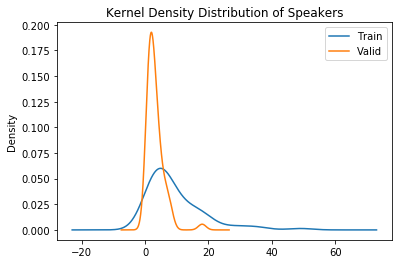

In [17]:
# Let's check the density distribution of speaker in our train and valid set. 
# This is not a very interesting plot but I can't think of anything better right now
spktr_df.value_counts().plot(kind='kde', title="Kernel Density Distribution of Speakers", label='Train')
spkva_df.value_counts().plot(kind='kde', label='Valid')
plt.legend()

In [18]:
# looks pretty spread out to me. Most of the speakers here have about 1-8 speech sample 
# but we do have some gold contributors with as high as 49 speech samples 
# submissions (and quality samples for that matter!). Viele Dank!
print(np.unique(spktr_df.value_counts().values, return_counts=True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18,
       19, 20, 23, 28, 29, 34, 36, 49]), array([7, 7, 6, 6, 5, 6, 7, 5, 1, 1, 4, 1, 2, 4, 1, 1, 3, 2, 1, 1, 1, 1,
       1, 1, 1]))


In [19]:
print(np.unique(spkva_df.value_counts().values, return_counts=True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8, 18]), array([16, 14, 10,  6,  4,  2,  3,  2,  1]))


In [23]:
# We have 77 unique speakers in our current speech database
total_speakers = list(spktr_df.value_counts().keys()) + \
                    list(spkva_df.value_counts().keys()) + \
                    list(spkte_df.value_counts().keys())

len(set(total_speakers))

77

In [24]:
# There is enough speaker coverage in train and valid, which is good. Not total cover but enough.
print(len(set(spktr_df.value_counts().keys())), 
              len(set(spkva_df.value_counts().keys())), 
              len(set(spkte_df.value_counts().keys())))

76 58 13
